*출처 : https://futureskill.io/

#### Probability

- 확률변수 : 확률적으로 값이 결정되는 변수
- 확률 분포 : 확률 변수가 어떤 값일 확률을 나타내는 함수
- 확률 : 어떤 사건이 일어났을 지에 대한 가능성을 0~1 사이의 숫자로 표현한 값

In [5]:
def pmf_coin(outcome):
    '''
    본 함수는 동전을 던졌을 때 나오는 결과(Head 혹은 Tail)를 입력값으로 받는다.
    입력값 outcome이 Head와 Tail 둘 중 하나일 때는 0.5, 그 외에는 0이 확률이 된다.
    확률 변수의 형식으로, 주어진 outcome에 대한 확률을 출력한다.
    '''
    if outcome in ('Head', 'Tail'):
        p = 0.5
    else:
        p = 0.0

    print(f"P(X = x) = {p:.2f}")

In [6]:
pmf_coin('Head')
pmf_coin('Tail')
pmf_coin('etc')

P(X = x) = 0.50
P(X = x) = 0.50
P(X = x) = 0.00


#### Probability distribution

In [8]:
def pmf_bern(p, x):
    '''
    주어진 p와 x에 관한 베르누이 분포의 확률 값을 반환한다.
    x는 0과 1만이 가능하다.
    '''
    if x in (0, 1):
        prob = (p**x)*((1-p)**(1-x))
    else:
        prob = 0
    print(f"P(X={x}; p={p}) = {prob:.2f}")
    return prob

In [9]:
pmf_bern(p=0.7, x=1)
pmf_bern(p=0.2, x=1)
pmf_bern(p=0.2, x=0)

P(X=1; p=0.7) = 0.70
P(X=1; p=0.2) = 0.20
P(X=0; p=0.2) = 0.80


0.8

#### pmf vs pdf

In [10]:
def pdf_unif(x, a=0, b=1):
    '''
    주어진 a, b, x에 관한 균등 분포의 확률 값을 출력한다.
    '''
    if x < a or x > b:
        prob = 0
    else:
        prob = (1/(b - a)) * (x - a)
    print("P(X=%s; a=%s, b=%s) = %.2f"%(x, a, b, prob))

In [11]:
pdf_unif(x=0.5)
pdf_unif(x=0, a=-1, b=2)
pdf_unif(x=2.5, a=0, b=3.5)

P(X=0.5; a=0, b=1) = 0.50
P(X=0; a=-1, b=2) = 0.33
P(X=2.5; a=0, b=3.5) = 0.71


#### Normal distribution

In [12]:
from scipy.stats import norm # scipy 패키지를 사용합니다. 
def pdf_norm(x, mu=0, sigma=1):
    '''
    주어진 x, mu, sigma에 관한 정규 분포의 확률 값을 출력한다.
    '''
    prob = norm(loc=mu, scale=sigma).pdf(x)
    
    print(f"P(X={x}; mu={mu}, sigma={sigma}) = {prob:.2f}")

In [13]:
pdf_norm(0)
pdf_norm(1.96, 0, 1)
pdf_norm(-1, 2, 10)

P(X=0; mu=0, sigma=1) = 0.40
P(X=1.96; mu=0, sigma=1) = 0.06
P(X=-1; mu=2, sigma=10) = 0.04


#### Binomial distribution

In [14]:
from scipy.stats import binom # scipy 패키지를 사용합니다. 
def pdf_binom(x, n, p):
    '''
    주어진 x, n, p 관한 이항 분포의 확률 값을 출력한다.
    '''
    prob = binom(n=n, p=p).pmf(x)
    print(f"P(X={x}; n={n}, p={p}) = {prob:.2f}")

In [15]:
pdf_binom(x=3, n=10, p=0.3)
pdf_binom(x=7, n=10, p=0.7)
pdf_binom(x=50, n=100, p=0.1)

P(X=3; n=10, p=0.3) = 0.27
P(X=7; n=10, p=0.7) = 0.27
P(X=50; n=100, p=0.1) = 0.00


#### Poisson distribution

In [42]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

def pmf_poisson_graphing(lamb):
    '''
    주어진 lambda에 대한 확률값을 시각화한다.
    x의 범위는 [0, 3*lambda]이다.
    '''
    xs = range(0, lamb*3+1)
    ps = [poisson(mu=lamb).pmf(x) for x in xs]

    fig, ax = plt.subplots()
    ax.plot(
        xs, ps,
        marker='o'
    )
    
    plt.show()

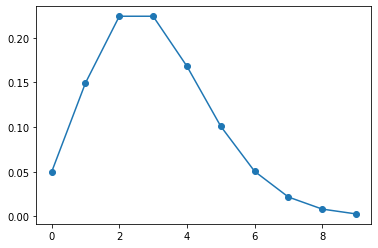

In [43]:
pmf_poisson_graphing(3)

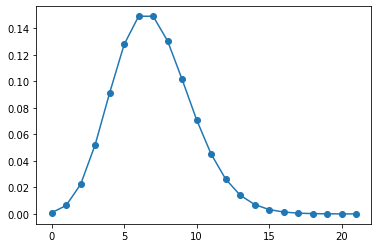

In [44]:
pmf_poisson_graphing(7)

#### Standardization and Normalization

In [52]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris() # 데이터 꺼내기
X = pd.DataFrame(iris.data, columns = iris['feature_names']) # pandas df로 변환

sepal_length = X['sepal length (cm)']
sepal_length_normalized = (sepal_length - sepal_length.mean()) / sepal_length.var()
sepal_length_standarized = (sepal_length - sepal_length.min()) / (sepal_length.max() - sepal_length.min())

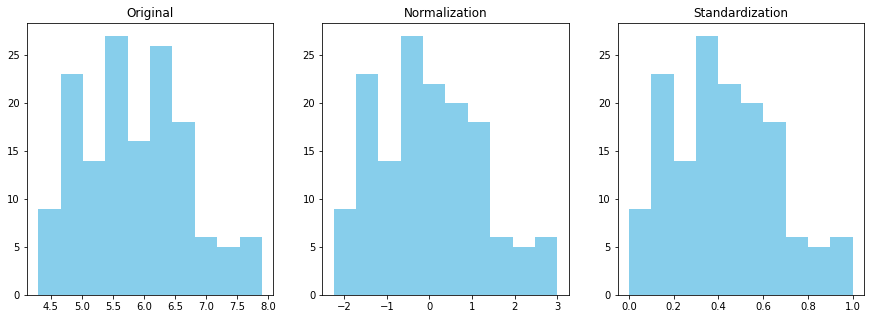

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
ax1.hist(sepal_length, color='skyblue')
ax1.set_title('Original')
ax2.hist(sepal_length_normalized, color='skyblue')
ax2.set_title('Normalization')
ax3.hist(sepal_length_standarized, color='skyblue')
ax3.set_title('Standardization')
plt.show()

#### Approximation

In [65]:
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt

def poisson_binom_plot(n, p):
    lamb = n*p
    mu = n*p
    std = n*p*(1-p)

    x_min = int(-n*0.2)
    x_max = int(n*1.2)

    probs_binom = [binom.pmf(i,n,p) for i in range(x_min, x_max+1)]
    probs_poisson = [poisson.pmf(i, lamb) for i in range(x_min, x_max+1)]
    probs_norm = [norm.pdf(i, mu, std) for i in range(x_min, x_max+1)]

    plt.plot(range(x_min, x_max+1), probs_binom, alpha=0.5)
    plt.plot(range(x_min, x_max+1), probs_poisson, alpha=0.5)
    plt.plot(range(x_min, x_max+1), probs_norm, alpha=0.5)
    plt.legend(['binom', 'poisson', 'norm'])
    plt.title(f'N={n}, p={p}')
    plt.show()

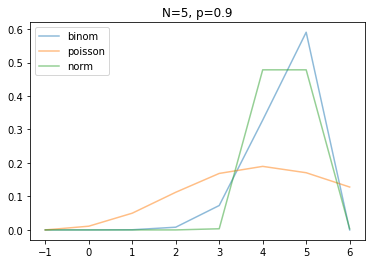

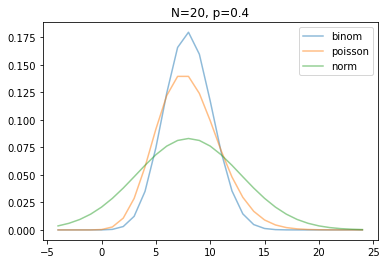

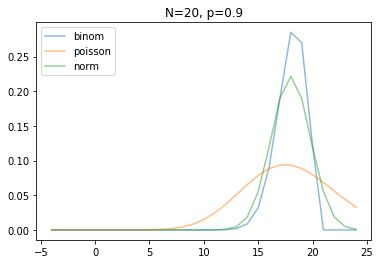

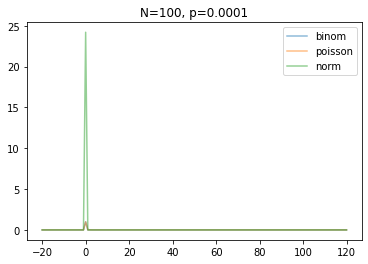

In [66]:
poisson_binom_plot(5, 0.9)
poisson_binom_plot(20, 0.4)
poisson_binom_plot(20, 0.9)
poisson_binom_plot(100, 0.0001)

#### Negative binomial distribution

In [ ]:
try_counts = []
    for _ in tqdm(range(n)):
        try_count = 0
		    '''       
				code here
		    '''
        try_counts.append(try_count)
    return try_counts

In [82]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import binom

def try_till_success(n):
    '''
    1. 1회씩 시도(Bernoulli)하여 성공 횟수가 10회 누적될 때까지 try count를 누적시킨다
    2. 10번 성공하면 try_counts에 append 한 뒤 초기화
    3. 1~2를 n회 반복
    *numpy에는 Bernoulli가 없으니 이항 분포에서 n=1로 하여 대신 사용한다.
    
    '''
    try_counts = []
    try_count = 0
    for _ in tqdm(range(n)):
        if binom(n=1, p=0.7).rvs() == 1:
            try_count += 1
        else:
            continue
            
        if try_count == 10:
            try_counts.append(try_count)
            try_count = 0
    
    return try_counts

def bar_plotter(nums):
    '''
    matplotlib이 제공하는 히스토그램은 여러 개를 겹쳐그릴 때 이쁘지 않아 bar plot으로 대신 그렸다
    '''
    num_counter = Counter(nums)
    plt.bar(
            num_counter.keys(),
            num_counter.values(),
            width=0.9, alpha=0.3
           )
    plt.show()

100%|██████████| 100000/100000 [00:42<00:00, 2365.01it/s]


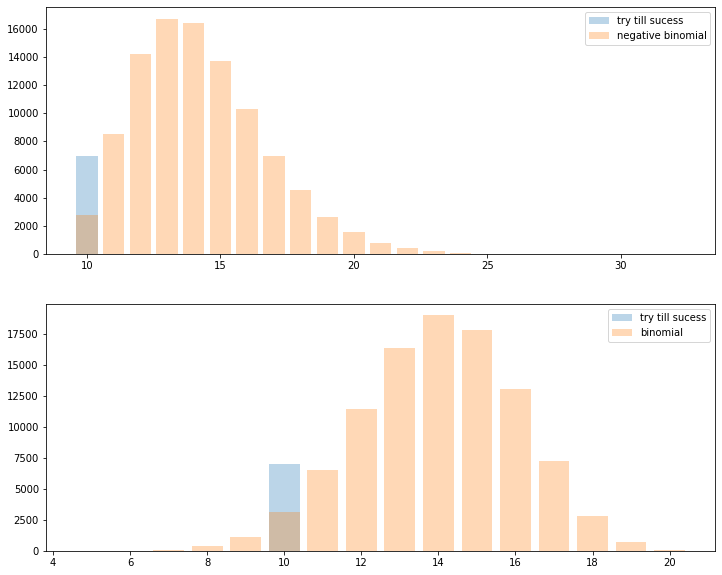

In [83]:
n = 100000
p = 0.7
try_list = try_till_success(n)
nb_list = [10+np.random.negative_binomial(10, p) for _ in range(n)]
binom_list = [np.random.binomial(int(10/0.7**2), p) for _ in range(n)]

try_counter = Counter(try_list)
nb_counter = Counter(nb_list)
binom_counter = Counter(binom_list)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.bar(try_counter.keys(), try_counter.values(), alpha=0.3)
plt.bar(nb_counter.keys(), nb_counter.values(), alpha=.3)
plt.legend(['try till sucess', 'negative binomial'])

plt.subplot(2,1,2)
plt.bar(try_counter.keys(), try_counter.values(), alpha=0.3)
plt.bar(binom_counter.keys(), binom_counter.values(), alpha=.3)
plt.legend(['try till sucess', 'binomial'])
plt.show()